In [1]:
import geopandas as gpd

In [2]:
# Load the Blighted_Area and Dumping2024 shapefiles
blighted_areas = gpd.read_file(r"C:\Users\navid\OneDrive - The University of Memphis\Attachments\0Research-Banai\GIS\OUTPUT\blighted_areas.shp")
litter_data = gpd.read_file(r"C:\Users\navid\OneDrive - The University of Memphis\Attachments\0Research-Banai\GIS\OUTPUT\litter_data.shp")

In [3]:
# Check the first few rows of each dataset to confirm the data is loaded correctly
print(blighted_areas.head())
print(litter_data.head())

  Status  Score Match_type                           Match_addr  \
0      M  96.34          A  730 ROANOKE AVE, MEMPHIS, TN, 38106   
1      U   0.00          A                                 None   
2      U   0.00          A                                 None   
3      M  93.72          A  591 N FOURTH ST, MEMPHIS, TN, 38105   
4      U   0.00          A                                 None   

                             LongLabel       ShortLabel     Addr_type  Type  \
0  730 ROANOKE AVE, MEMPHIS, TN, 38106  730 ROANOKE AVE  PointAddress  None   
1                                 None             None          None  None   
2                                 None             None          None  None   
3  591 N FOURTH ST, MEMPHIS, TN, 38105  591 N FOURTH ST  PointAddress  None   
4                                 None             None          None  None   

  PlaceName                           Place_addr  ... IN_Country  \
0      None  730 ROANOKE AVE, MEMPHIS, TN, 38106  ... 

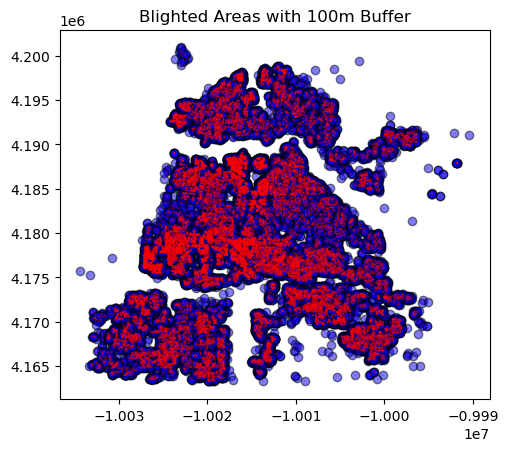

In [8]:
# Reproject to a projected CRS (e.g., EPSG:3857 for Web Mercator)
blighted_areas_projected = blighted_areas.to_crs(epsg=3857)

# Create a buffer around each blighted area (e.g., 100 meters) in the new CRS
blighted_areas_projected['buffer'] = blighted_areas_projected.geometry.buffer(100)

# Plot the original blighted areas and their buffers
ax = blighted_areas_projected.plot(color='blue', alpha=0.5, edgecolor='black')
blighted_areas_projected['buffer'].plot(ax=ax, color='red', alpha=0.3)
plt.title("Blighted Areas with 100m Buffer")
plt.show()